In [113]:
from IPython.display import display, Javascript, HTML
display(HTML("<style>.jp-Notebook { width: 85% !important; }</style>"))

#### Hack för att bli av med ful-cellerna vid export till HTML ####
# Tagga med hide-cell, sen lägg till i den genererade html-filen i <style>:
# div.celltag_hide-cell {display: none;}


In [117]:
%%html
<style>
.jp-CodeCell .jp-Editor,
.jp-RenderedHTMLCommon {
    font-size: 20px;
}
.jp-CodeCell .jp-InputArea-editor {
    font-size: 20px;
}
</style>


<div class="alert alert-block alert-success">
<h3>Summering av vad vi gjort hittils</h3>
</div>



Efter [vårt första neuron-experiment](https://ulfschack.github.io/slide_4PixelNN/regression.html), kan vi låtsas att vi efterliknar en laboration i kemi eller fysik där mätvärden
på en $x-y$ graf ligger spridda över och under, men ca längs en linje.
I normala fall hade läraren bett er sätta en linjal till pappret
och dra ett streck sådant att det bäst representerar den ekvation
som experimentet syftar till att ta reda på

Här har vi gjort så vi slipper titrera, mäta och hålla på,
genom att ta "ekvationen som söks" och lagt till slumpfel
uppåt och neråt (+/-) - i $facit(x)$ funktionen - så att $x-y$ grafen blir en 
brusig och yvig linje. Sen låtsas vi att dessa koordinater är era
uppmätta värden som ni ska hitta bäst linje till. Lite baklänges sådär.
Men nu har vi i a f en massa $x$ med tillhörande $y_{sann}$ (som alltså inte är *så* himla sanna) att mata neuronen med

Nu är det vår lilla NNs uppdrag att för varje givet $x$-värde ge förslag på ett $y$-värde. Sen får den reda på hur fel den hade i.f.h.t $y_{sann}$, vilket gör att vi med <b>back-propagation</b> kan justera $w$ och $b$ (jmfr $k$ och $m$ för räta linjen). När den
sen blivit matad och tillrättavisad några hundra ggr, så tittar vi om inte 
både $w$ och $b$ har börjat likna $k$:et och $m$:et i $linje(x)$, den sanna ekvationen.  

(Om man inte har nån linjal så får man hitta nåt annat sätt ju  )

<a href="https://ulfschack.github.io/slide_regr/index.html">
  <img src="https://ulfschack.github.io/slide_regr/Layer13.PNG" alt="Presentation-neuron" width="900">
</a>

50
Färdigtränad weight: 10.0344334112758
tränad bias: -3.019978489554668


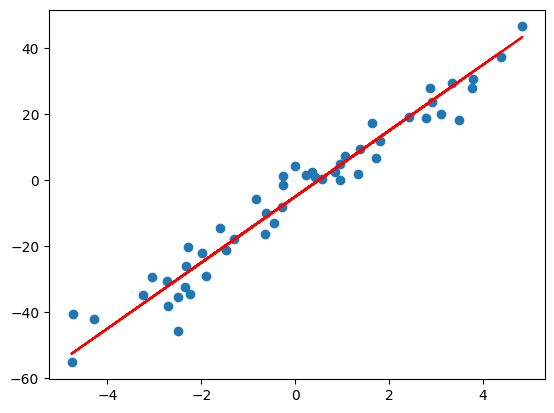

In [34]:
import random
import matplotlib.pyplot as plt
import numpy as np
import csv   
 

# Så att det finns ett "minimum" att eftersträva
def abs_loss(y_sann, y_gissn):
    return abs(y_sann - y_gissn)

def line(x):
    return 10*x-5

def facit(x):
    global rng
    noise = rng.normal(0.0, 5)
    return line(x) + noise

#samla statistic
Xs = []
Ys = []
y_line = []
rng = np.random.default_rng(12345)

def samlaStat(x,y):
    global Xs, Ys
    Xs.append(x)
    Ys.append(y)

# Träningsdata förbereds
random.seed(42)  # For reproducerbarhet när vi jämför varandras program
num_samples = 500   #så här många x-gissningar ska vi träna med

# Initialize weights and bias
w = random.uniform(-1,1)
b = random.uniform(-1,1)

# Träningsparametrar så den inte går för snabbt o flippar ut
learning_rate = 0.015

# Tränings loop
for num in range(num_samples):
    x = random.uniform(-1,1) * 5
    #y_sann = 2 * x +3  # f(x) = 3*x + 2
    y_sann = facit(x)
    
    # Framåt
    Zum = x * w + b # Slutliga gissningen, som ska jmfrs med facit (y_sann)

    # Beräkna fel / loss
    loss = abs_loss(y_sann, Zum)

    # Baklänges pass - beräkna den totala gradienten / lutningen m.h.a kedjeregeln
    dLoss_dyGiss = 1 if Zum > y_sann else -1
    dLoss_dw = dLoss_dyGiss * x     #(jmfr y = kx + m)
    dLoss_db = dLoss_dyGiss         # * 1 egentligen

    # Uppdatera weights & bias
    w -= learning_rate * dLoss_dw
    b -= learning_rate * dLoss_db

    if num % 10 == 0:    # Var tionde
        #print(f"ant_x {num}, Loss: {loss:.4f}")
        samlaStat(x, y_sann)
        y_line.append(line(x))

# Detta ska jämföras med facit-funktionen f(x) = (def line(x) ovan)
print(len(Xs))
print(f"Färdigtränad weight: {w}")
print(f"tränad bias: {b}")

if True:
    plt.scatter(Xs, Ys)
    plt.plot(Xs, y_line, color='red')
    plt.show()


# Skriv data till fil

with open('matdata.csv', 'w', newline='') as file:
     writer = csv.writer(file, delimiter=' ')
     
     writer.writerow(Xs)
     writer.writerow(Ys)
     
# testa på
# https://stats.blue/Stats_Suite/correlation_regression_calculator.html
#

<div class="alert alert-block alert-success">
<h3>Att känna igen "bilder" (fyra pixlar)</h3>
</div>

Så här var [ambitionen](https://www.youtube.com/watch?v=ILsA4nyG7I0&list=PLVZqlMpoM6kaJX_2lLKjEhWI0NlqHfqzp). Att när vi väl sett att det gick att känna igen de olika "bilderna", så visste vi i.a.f. att det var möjligt. Nu är frågan om vi kan få nätverket till att träna sig så att det klarar uppgiften. Inte (alls) nödvändigtvis med samma metod, i slutändan. Men med någon, åtminstone

<!--
Image("fourPix.png", width=500, height=350)
-->
<img src="https://ulfschack.github.io/slide_4PixelNN/fourPix.png" style="width: 700px; height: auto; margin-left: 10px;">


Här visade det sig att man faktiskt kunde få nätverket att kategorisera typer av input, ifall man kopplade på just detta sätt i.a.f. Så man hade visat "existens", men inte <b>metod</b> för att komma dit.

Detta (nedan bild), är ett enklare nätverk och klarar kanske jobbet nästan lika bra(?)

<!--
Image("4x6x4.png", width=700, height=450
-->

<img src="https://ulfschack.github.io/slide_4PixelNN/4x6x4.png" style="width: 700px; height: auto; margin-left: 10px;">

Istället för att resonera fram till hur man skulle kunna använda **w**ikterna och **b**ias för att trolla fram rätt förslag såsom i videon, låter vi nätverket träna sig själv med hjälp av en *Loss* funktion som tar det genomsnittliga kvadratavståndet, **M**ean **S**quare **E**rror (MSE) mellan prediktion och rätt svar.  
I förra övningen använde vi ju $L(Z)=abs(Z-Y_{sann})$, alltså absolutbeloppet av skillnaden, också en funktion med ett väldefinierat minimum, men här går vi över till MSE eftersom i en andragradare typ ($x^2$) finns inga svaga punkter, och är deriverbar (hitta k-värdet) även om gissningen skulle visa sig vara rakt på det rätta svaret ($Y_{sann}$). och är en vippebräda, och omöjlig att hitts k-värde till. Dessutom är lutningen på en mjuk Loss-funktionen en indikation på hur långt vi är från minimi-punkten. Kom ihåg att även om vi kommer få värdet, och därmed hur fel, finns det inget lätt sätt att beräkna hur mycket vi hade skullat ändra våra vikter för att eliminera det.  

Med ett uttryck som MSE vet vi åtminstone vilken sida om det rätta svaret vi befinner oss på. Lutningen (eller k-värdet) är större ju mer fel gissningen är när vi har en andragradere som Loss-funktion. Detta faktum används också ofta till att bestämma med vilken grad man stegar upp iterationerna i datorkod (vi har inte gjort denna anpassning vare sig i förra eller ens denna uppgiften. Eftersom datorn inte lider så värst utan sådan optimering i denna uppgift.  


Den grå cirkeln på det mittersta lagret i ritningen ovan är vår *aktiveringsfunktion*. Den, som ni säkert har hört tusen ggr vid detta lag, är **HELA** anledingen till att ett neuralt nätverk kan lära sig katgorisera mellan *fler* saker än de (två nödvändigtvis) som kan skiljas åt med en rät linje (som vi gjorde i förra övninen. Antingen var punkten över, eller så var den under "ekvationen". Sambanden kan vara hur invecklade och komplexa som helst. Det är bara att fläska på med fler lager och fler neuroner och mer träning. Och fler datorer då förstås.

<div class="alert alert-block alert-success">
<h3>Det praktiska då ...</h3>
</div>

Innan man börjar måste vi komma på ett sätt att skicka in datan i nätverket samt ett sätt att representera *rätt svar* på. *Ja/nej* eller *hur nära* (mer om det längre ner). $X$-input får bli fyra tal, ett för varje pixel, med värden mellan -1 och 1, helsvart till helvitt, samlade i en vektor, avlästa från "bilden" vänster till höger, uppifrån och ner. 

<div class="alert alert-block alert-info"><b>P.S</b> <i>I denna genomgång använder vi endast extremvärdena $\pm$ 1 som vår input.</i> <span style=color:black>Svart</span> eller <span style=color:white>vitt</span></div>

In [98]:
# Här är alla åtta mönster med tillhörande svar. Men vi tar enstaka, till att börja med iaf.

Xalla = np.array([[1, -1, 1, -1], [-1, -1, 1, 1], [-1, 1, 1, -1], [-1, -1, -1, -1],
              [-1, 1, -1, 1], [1, 1, -1, -1], [1, -1, -1, 1], [1, 1, 1, 1]])
#               Vert            Hor               Diag          Solid
Yalla = np.array([[0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0], [1, 0, 0, 0],
              [0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0], [1, 0, 0, 0]])

Nedan är resultatet, från ett program jag redan skrivit, när jag testar efter ha tränat med alla ovanstående input ($X$) och svar ($Y$). Testet var att identifiera de fyra första inputen (eller fyra sista, som ju är samma kategorier) från $X_{alla}$, dvs (solid, diag, hor, vert). Och det kom ut ganska hyggligt, med en av siffrorna i varje svars-rad nära $1$ och de andra, nära $0$. Tillräckligt nära, i alla fall, för att man ska kunna sluta sig till vilket mönster det var frågan om

<i>(Det gav ett rätt hyggligt resultat ... typ  )</i>

<!--
Image("fourPx_guesses.png", width=500, height=350)
-->
<img src="https://ulfschack.github.io/slide_4PixelNN/fourPx_guesses.png" style="width: 500px; height: auto; margin-left: 10px;">

Vi sätter igång</span>, och inför **numpy**, ett Python-paket som gör det enkelt att räkna med vektorer och matriser (många siffror på en gång), som om de vore enkla skalärer.  

In [ ]:
!pip install numpy

<span style=background-color:lightgray>Vi parameteriserar</span> (hittar på namn för konstanter) från början hur stort varje lager (tre i allt) skall vara, så att vidare kod bygger på dessa istället för hårda siffror. Så ifall vi skulle vilja ändra senare behöver vi bara ändra värden där dessa sätts i början, på ett ställe i koden, istället för att jaga siffror överallt. Trust me, det blir bättre så ... om än något styltigare.

<div class="alert alert-block alert-info"><b></b>Metoden är densamma som "nätverket" med en enda neuron, ovan. Bara med ytterligare en $Z$-beräkning 

$$X\rightarrow (\times W_1 + b_1)\rightarrow Z_1 \rightarrow tanh(Z_1)\rightarrow (\times W_2 + b_2) \rightarrow Z_2 \rightarrow loss(Z_2, Y_{sann})$$
$$ \rightarrow \text{(back prop. m.h.a } \mathbf{kedjeregeln}) \rightarrow\text{(justera } alla~ W \text{ och } b\text{)} \rightarrow \text{ och om igen ... }$$
</div>


In [13]:
# Hur många neuroner som varje lager ska ha
input_size = 4
hidden_size = 6
output_size = 4

In [41]:
import numpy as np   #Kompisen numpy
# Vikterna slumpas mellan -1 och 1
W1 = np.random.randn(input_size, hidden_size)
W2 = np.random.randn(hidden_size, output_size)

# Låt bias vara noll första ggn. Dom kommer ändå vara med i uppdateringen, men ... 
# ... matten blir mindre klottrig på så sätt
b1 = np.zeros(hidden_size)
b2 = np.zeros(output_size)

In [15]:
W1   # oups, det här skulle vi kanske inte ha visat riktigt än

array([[ 8.10227756e-01, -1.03213725e+00,  1.30103711e+00,
        -1.39153195e+00, -1.11178880e-01, -1.02164994e+00],
       [-1.50392146e+00, -1.15548554e+00, -1.12855887e+00,
        -2.51622137e-01, -1.34301964e-03, -1.00638873e+00],
       [ 2.86858371e-01, -2.53180313e-01,  1.53217355e+00,
        -2.37793748e-01, -2.59928649e-02,  5.61227162e-01],
       [ 6.16974641e-01, -1.03494413e+00, -7.28138176e-02,
        -2.10759152e-01,  8.04421712e-01, -1.25382244e-01]])

In [16]:
X = np.array([1, -1, -1, 1])  #diagonal

In [42]:
# I första omgången är ju "b":na alla nollor, så vi tar inte med dom 
# ... i beräkningen för vårt första Z1

Z1=np.dot(X,W1)

In [43]:
Z1

array([ 0.15395423,  2.34850344,  0.60589301,  0.46569974, -0.22227896,
        5.00057989])

<div class="alert alert-block alert-info"><b></b>Dessa matriser och vektorer ser kanske skrämmande ut, men om vi använder dem som vi gjorde i det enkla fallet, där det var frågan om <i>skalärer</i>, kommer matten faktiskt se (nästan) likadandan ut.</div>

<span style=background-color:lightgray>Vi behöver också definiera vår enda aktiveringsfunktion $tanh(z)$. Och den är redan färdig i Numpy ...</span>

<img src="https://ulfschack.github.io/slide_4PixelNN/tanh.png" style="width: 300px; height: auto; margin-left: 10px;">

<span style=background-color:lightgray>... så vi behöver bara skriva:</span>

In [20]:
def tanh(x):
    return np.tanh(x)

<span style=background-color:lightgray>... Och så gör den det för alla sex värden i Z1, så här</span>

In [21]:
A1=tanh(Z1)

In [22]:
A1

array([ 0.96288196,  0.71877794,  0.99937411, -0.82329015, -0.73533729,
        0.58586602])

<span style=background-color:lightgray>Och sen bara en 'repeat' av vad vi gjorde för att beräkna $Z1$. Skalärprodukt igen</span>

In [9]:
# Skippar bias här också, men dom kommer med i leken när vi uppdaterar
Z2=np.dot(A1,W2)

In [24]:
Z2

array([-2.46248447, -2.33512413,  0.2132289 ,  0.55320145])

<div class="alert alert-block alert-info"><b></b>Dessa fyra värden är alltså vad nätverket till slut producerat. De går till mötes, brevid varann, en bedömning av hur fel dom är (visst känner man igen sig?) i en Loss-funktion - ibland även kallad Cost-function, eller Error-function. Det är denna marginal som används till att beräkna storlek och riktning av förändringen av matriserna $w_1$, $w_2$ och vektorerna $b_1$ och $b_2$. Dessa förändringsmatriser/vektorer benämns följdaktligen $dw_1$, $dw_2$, $db_1$ och $db_2$ ($d$ som i differens) och har samma dimensioner.</div>

<div class="alert alert-block alert-success">
<h3> Rätt & Fel </h3>
  </div>
Härunder tar vi en väldefinierad "bild" på en diagonal (som vår $X$-input. Som svaret på "vad som är sant" kan vi hitta på precis vadsomhelst. Nätverket struntar i vilken hjärntvätt det blir utsatt för. så länge vi är konsekventa och säger likadant om samma mönster varje gång det upprepar sig$^{(**)}$. Om vi bestämmer kategorin <i>diagonalt</i> till att vara den tredje av fyra möjliga kategorierna, blir rätta svaret: $Y_{diag} = [0, 0, 1, 0]$<br><br>
$^{(**)}$ Man hade egentligen kunna bestämma sig för en helt annan bedömning här. Istället för en vektor skulle man t.ex kunna haft en skalär mellan 1 och 4 för var och en av <i>solid, vert, hor, diag</i> - kategorierna. Eller varför inte som två digitala bits som ju kan kombineras på fyra sätt? Vissa lösningar/bedömningar är säkert mer effektiva än andra, men sånt kan man experimentera med senare.   
Grunden till att jag här valde en 4-värdig vektor är att det är en fördel att ha ett facit (Y) med samma dimension som nätverkets output ($Z_2$) så man lättare kan jämföra "avståndet" element mot element i en <i>loss</i> funktion.  


Jag har bestämt oss för att använda *MSE*, dvs en Loss-funktion som tar differansen mellan vår gissning $Z_2$ och $Y_{sann}$, kvadrerar det, och tar genomsnittet (delar med 4 alltså)

In [25]:
#Och låt oss inte glömma Y_sann, som får reprensentera någon av de fyra mönstren

Y = np.array([0, 0, 0, 1])

<!--
image_url = "https://ulfschack.github.io/slide_4PixelNN/lossFunc.png"
Image(url=image_url, width = 600)
-->
<img src="https://ulfschack.github.io/slide_4PixelNN/lossFunc.png" style="width: 600px; height: auto; margin-left: 10px;">

<div class="alert alert-block alert-info"> <!-- <b>NOTE</b> --> Den, till synes krångliga summa-formeln ovan är t.ex inget annat än det du ser på högersidan av bilden, nämligen summan av alla fyra differanser (mellan gissning och facit) tagna i kvadrat. Och sen genomsnittet (dividera med 4 alltså)</div>

<span style=background-color:lightgray>Så här skulle man kunna implementera MSE ...</span>

In [60]:
# Z2 = [-2.39814425, -2.18459557, -0.84819751,  3.14512432]
diff = Z2-Y

In [67]:
sum = 0
for i in diff:
    sum += i**2
L_mse = sum/4.0
print(L_mse)

3.961137748796248


<span style=background-color:lightgray>Men den finns också inbyggd i numpy, så ..</span>

In [66]:
# Vi ska se om numpy fixar detta också, så om vi definierar
# MSE loss function
def loss_mse(output, Y):
    diff = output - Y
    loss = np.mean(diff**2)
    return loss
# Så borde vi få samma
print(loss_function(Z2,Y))

3.961137748796248


<div class="alert alert-block alert-info"> <!-- <b>NOTE</b> --> Du kanske undrar varför man skulle vilja använda numpys inbyggda MSE-funktion när det gick så där snabbt att skriva den själv? Jo, därför *numpy* kan hantera *grupper* av siffror, på en gång, i form av vad man kallar vektorer (1xn dimensioner) och matriser (nxm dimensioner). Senare när man tränar vill man gärna köra s.k mini-batches av input / svar, där man jämför ett helt knippe input-vektorer mot ett lika stort knippe svars-vektorer (då blir det grupper av siffror <i>inom</i> grupper av siffror, kan man säga) så man får mer balancerade, och inte så många, uppdateringar av vikterna och bias:erna, så att inte nätverket rusar iväg och ställer in sig för att bli extrabra på att känna igen enstaka mönster, säg diagonaler. Det ska ju lära sig alla mönster. Dessutom slipper man som sagt att uppdatera dem lika ofta. Så win-win. </div>

<!--
<div class="alert alert-block alert-success"> Use green boxes sparingly, and only for some specific purpose that the other boxes can't cover. For example, if you have a lot of related content to link to, maybe you decide to use green boxes for related links from each section of a notebook. </div> -->


<div style="font-size: 80%;"><i>Följande stycke är för den intresserade, och inget som är nödvändigt för lösandet av uppgifter
Utan att gå in på för mycket detaljer har jag gjort en liten animering om hur man hittar vägen att gå för att minimera felet (loss). Matematiken bakom, läser man på universitetet, men alla kan förstå hur man kan hitta två k-värden till vilka två kurvor som helst. Nedan är det fråga om en 3D yta (vår loss-funktion) där man, igenom en punkt, skurit ett snitt längs, än y-axeln, och än längs x-axeln (här har jag kallat dom $x_1$ och $x_2$ för att generalisera, eftersom det oftast rör sig om <b>massor</b> av inputs. T.o.m i vår lilla övning har vi fyra).  

På detta sätt bildas ju två stycken tvådimensionella vanliga kurvor, som båda har väldefinierade tangenter, med lutningarna (k-värdena) $k_{x_1}=dL/dx_1$ och $k_{x_2}=dL/dx_2$. Om man sätter ihop dessa tangenter till en vektor (som kallas 'gradient' ($\nabla$), uttalas nabla) kommer den att peka åt det hållet där 3D-ytan ökar snabbast (återigen universitetsmatte, men kanske också ganska intuitivt om man känner efter). Vi vill därför gå åt motsatta hållet, $-\nabla$</i></div>


In [26]:
from IPython.display import Video

Video("/Users/ulfschack/Lektioner/prog/jupyter_env/JPNfiler/teknik1/NeuralNet/Neural_full/_site/slide_4PixelNN/croppat.mp4", embed=True, html_attributes="controls loop")


<div class="alert alert-block alert-success">
<h4>Nu är det dags att gå baklänges</h4><br>
... för att hitta $\nabla$
</div>



<a href="https://ulfschack.github.io/slide_4PixelNN/index.html">
  <img src="https://ulfschack.github.io/slide_4PixelNN/p1.PNG" alt="Any text here" width="600"><h3>Click me</h3>
</a>

### Övning 1 ###

<div style="background-color : #F9EBCF ">
Utifrån presentationen ovan, hitta alla de k-värden som behövs för att uppdatera alla vikter och bias m.h.a kedjeregeln. Dvs följ förloppet från slut till början i sammanhanget, $L\rightarrow _2 \rightarrow A \rightarrow Z_1 \rightarrow X$ och gå ut i 'noderna' som är bias och vikter. För både nivå 1 och 2.

> <i>För tillfället ska ni betrakta nätverket som skalärt. Dvs ett singulärt värde för $X$, $b1$, $w2$ ... etc
</div>
<i>(Detta är en större övning, och kommer nog ta mer än några minuter, men nu har ni lyssnat på föreläsningar länge nog :) )</i>

<div style="height:100px;"></div>

<span style=background-color:lightgray>Påminner om varför vi använder kedjeregeln.</div>

In [1]:
from IPython.display import Video

Video("/Users/ulfschack/Lektioner/prog/jupyter_env/JPNfiler/teknik1/NeuralNet/Neural_full/_site/slide_4PixelNN/chainRule.mp4", embed=True, html_attributes="controls loop")


Det finns en anledning till att färgkoda x- och y-axlarna som utgör trianglar för beräkning av k-värdet. Den vänstrastes y-värde är den mellerstas x-värde, som till slut är ingående x-värde till den högra. Varefter även den funktionen gör vad den vill med det (i detta fall bara gångar med 3, som en tråkmåns). Det samlade k-värdet blir således $2*0.5*3=3$, efter multiplikation

<div class="alert alert-block alert-success">
<h3>Lyfter på locket till matriser o sånt ... </h3>
</div>

Så här multipliceras matriser. Jag tar upp det, eftersom det visar sig att ifall man vill gånga varje X-värde med sina respektive vikter på väg in mot en neuron, så blir matten precis densamma, ifall man vänder grejer rätt.

<!--from IPython.display import Image
image_url = "https://ulfschack.github.io/slide_4PixelNN/matrixMul.png"
Image(url=image_url, width = 700)
-->
<img src="https://ulfschack.github.io/slide_4PixelNN/matrixMul.png" style="width: 700px; height: auto; margin-left: 10px;">

### Övning 2 ###
<div style="background-color : #F9EBCF ">
Titta på dimensionerna och förstå hur vektorerena och matriserna måste paras ihop för att producera nya matriser, vektorer och skalärer av rätt dimension för både fram- och bakvägen.  



>Räkna exempel-matriser och leverera dw1, db1, dw2, och db2. Du kan använda papper och penna, Python, Geogebra, eller vad du vill. Bara du lär dig, och kan redovisa det. </div> 

<i>Fast du vill nog läsa repetitionen nedan, en gång eller två.</i>


<div style="height:50px;"></div>

<b>Nedan, ska föreställa en ritning</b> på nätverket i något större detalj. Jag har valt ut två neuroner. En från det första lagret som är direkt kopplat till input ($\vec{X}$, och en som från det sista. Här ser man hur summan i neuroner bildas och vilka och hur många vikter som är inblandade. Jag hoppas att ritningen kan hjälpa en att fundera igenom hur långa/stora vektorerena måste vara för att passa varandra.<br><br>

*T.ex var i matrisen $W1$ sitter - och vilket index har - den vikt som skall multilpliceras med, säg, $x_1$ och som till slut bli del i bl a $z_4$, strax före aktiveringsfunktionen osv. Låter det komplicerat? - Det var meningen, och lite överdrivet såklart, men sånt måste tänkas igenom åtminstone en gång. Sen ser man hela matriser och vektorer som vilka variabler som helst. Dessutom bruka programmet crascha om man vänt något fel ;).*  
    
>En av anledningarna till att jag valde 4x6x4 för nätverket var just att det skulle bli tydligare hur matriser vänds och vrids. Det hade man ju inte lätt kunnat se i det ursprungliga 4x4x4 nätverket, där allt har samma dimension.

<img src="https://ulfschack.github.io/slide_4PixelNN/matMulDim.png" style="width: 600px; height: 600px; margin-left: 10px;">

<span style=background-color:lightgray><i>... och vi struntar fortfarande i $b-värdena$, som du ser.</i></span>

<div style="height:50px;"></div>


<!--
<div style="display: flex; justify-content: space-between;">
    <div style="width: 40%;">
      
    </div>
    <img src="https://ulfschack.github.io/slide_4PixelNN/scalarProd.png" style="width: 40%; height: auto; object-fit: contain;">
</div>
-->
<h4>Vektormultiplikation</h4>
<div style="display: flex; justify-content: space-between;">
    <div style="max-width: 55%; margin-right: 70px;">
        Vi utgår från skalärprodukten som, vars namn antyder, producerar <i>en</i> siffra. Detta är det vanligaste ekvivalentet till att 'multiplicera' två vektorer. Och det är denna typ av multiplikation vi använder (nästan alltid) när vi beräknar saker som $\vec{x} \cdot \vec{w}$ <br><br>
    </div>
    <img src="https://ulfschack.github.io/slide_4PixelNN/scalarProd.png" style="width: 45%;">
</div>



<div style="height:50px;"></div>

<!--
image_url = "matMulSiffror.png
Image(url=image_url, width = 600)

<img src="https://ulfschack.github.io/slide_4PixelNN/matMulSiffror.png" style="width: 700px; height: 400px; margin-left: 10px;">
-->

<div style="display: flex; justify-content: space-between;">
    <img src="https://ulfschack.github.io/slide_4PixelNN/matMulSiffror.png" style="flex: 1; width: auto; height : 250px; object-fit: contain;">
    <div style="max-width: 60%; margin-left: 50px;">
        <h4>Utöka till matris</h4>
        Om vi sen lägger till fler kolumner brevid den första utökas den till vad vi kallar matris. Principen är den samma, bara det att nu blir resultatet också en vektor. Man skriver då istället ofta $\vec{x} \cdot [w]$, för att förtydliga vilka objekt det rör sig om.
    </div>
</div>


<div style="height:50px;"></div>

<span style=background-color:lightgray>Repris från ovan, så gäller rent allmänt alltså:</span>

<!-- from IPython.display import Image
image_url = "https://ulfschack.github.io/slide_4PixelNN/matrixMul.png"
Image(url=image_url, width = 600)
-->

<img src="https://ulfschack.github.io/slide_4PixelNN/matrixMul.png" style="width: 700px; height: 400px; margin-left: 10px;">

<div style="height:50px;"></div>

<div style="display: flex; justify-content: space-between;">
    <div style="max-width: 40%; margin-right: 50px;">
        Är inte detta <i>precis</i> vad som ska till för att t.ex räkna ut vad alla neuronerna $Z_{nåt}=w_{nåt}\cdot x_{nåt}$ kommer att bli? Titta på bilden igen. Synapserna som förbinder de blå med de gröna är 24 till antalet, 4 input för var och en av de 6 gröna $z$. Alla dessa $w$ kan ordnas i kolumner i en matris (4x6) så att vi snabbt får uträknat alla 6 värden i $\vec Z$, i ett svep. Med 'snabbt' menar jag - av ett program eller app som har såna här grejer inbyggt. Och dom är många, eftersom denna matte används inom massor av andra områden. För $\vec Z_2$ är $w$-matrisen vänd på huvudet (6x4) och innehåller såklart andra värden
    </div>
    <img src="https://ulfschack.github.io/slide_4PixelNN/matMulDim.png" style="flex: 1; width: 400px; height : 400px; object-fit: contain;">
</div>

 

<div style="height:50px;"></div>

>En ytterligare överrasking, om ni är redo, är att ifall man ställer vektorer alldeles "fel", båda två uppochner, så får man faktiskt också ett resultat. Produkten blir med ens multidimensionell och varje element i vektorn multipliceras bara en gång med motsvarande i den andra. Så här (se bild)
>

<div style="height:50px;"></div>

<!--
image_url = "matMulSiffror.png
Image(url=image_url, width = 600)

<img src="https://ulfschack.github.io/slide_4PixelNN/matMulSiffror.png" style="width: 700px; height: 400px; margin-left: 10px;">
-->
<div style="display: flex; justify-content: space-between;">
    <div style="max-width: 60%; margin-right: 30px;">
        Även här funkar det precis som vi hade velat. Tänk t.ex när vi ska gå back-propagation från $Z_2$ (4 noder) till $A$ (6 noder), så blir produkten (outer) en matris bestående av 24 siffror. (Vilken tur va?) Det utvigdgade begreppet <i>matrismultiplikation</i> innebär också att om man ställer vektorerna precis omvänt mot vad man skulle vid en skalärprodukt, kommer resultatet bli en matris. Ni kommer använda detta när ni t.ex beräknar $\frac{dL}{dw2}$, när fyra (4) st. $Z_2$-värden (o försök hänga med här, Linus ... ja du har en evig plats här) skall bli till 24 st. $w$-värden i $W2$-matrisen, den som sitter mellan $A$ och $Z_2$ 
    </div>
    <img src="https://ulfschack.github.io/slide_4PixelNN/outerProd.png" style="flex: 1; width: 400px; height : 400px; object-fit: contain;">
</div>


<div style="height:50px;"></div>

<span style=background-color:lightgray>Ok, vidare med uppgiften ...</span> 

### Våra första $k-värden$ ###
##### lite hjälp på vägen #####

$k$-värdet för loss-funktionen är samma som för den kurva vi räknade på tavlan med $\frac{\Delta y}{\Delta x}$ för $y=x^2$ (när triangelns sidor gick mot noll), nämligen $2 \cdot x$. Ersätt bara $x$ med $(Z_2-Y_{sann})$ så får man: $k_{loss}=2 \cdot (Z_2 - Y_{sann})$. Och på Pythonesiska blir det:

In [52]:
dLdZ_2 = 2 * (Z2 - Y)  # MSE back-derivative fram till sista Z:at

In [53]:
dLdZ_2

array([-4.92496893, -4.67024825,  0.4264578 , -0.8935971 ])

In [54]:
# En 6x1-vektor "gångat med" en 1x4-vektor ger en 6x4-matris, ...
# ... vilket ju är precis vad vi behöver

dW2 = np.outer(A1.T, dLdZ_2)

# Numpy använder tyvärr en annan funktion, 'np.outer' (istf. np.dot) när båda är vektorer.
# (För att vända en rad-vektor till en kolumn-vector används ".T" (T för 'tranponering'))

In [55]:
dW2

array([[-4.74216373, -4.49689778,  0.41062853, -0.86042853],
       [-3.53995904, -3.35687144,  0.30652846, -0.64229789],
       [-4.92188643, -4.66732518,  0.42619089, -0.89303781],
       [ 4.05467842,  3.8449694 , -0.35109851,  0.73568969],
       [ 3.62151333,  3.43420771, -0.31359033,  0.65709528],
       [-2.88537197, -2.73613978,  0.24984714, -0.52352818]])

In [57]:
# Eftersom Z2 = W2*A1 + b, så är lutningen (m.a.p 'b') lika med 1, bara. Alltså är
db2 = dLdZ_2 * 1
# Dvs samma

<span style=background-color:lightgray>Med hjälp av detta bör du själv kunna  beräkna $dw_1$ och $db_1$. Jag påminner om att du fått (se slides om det inte låter bekant) $k$-värdet för aktiveringsfunktionen av mig helt gratis, nämligen att $k_{tanh}=1 - tanh(Z_2)^2$ ... eftersom du inte har hunnit plugga matten bakom, än</span>

<div class="alert alert-block alert-info"><b>Även om det kanske är något komplicerat</b> till uttrycket, saker såsom $dL/db2$ - <i>det samlade $k$-värdet, via multiplicering genom kedjeregeln hela vägen från vår loss-funktion till vårt andra $b$-värde</i> - är det faktiskt ändå också en <b>kvot</b> med verklig täljare och nämnare. Inget av värdena, vare sig i täljare eller nämnare är noll. De <i>går</i> mot noll, och är siffror du kan använda som om de vore tal i en vanlig ekvation. (<i>Nästa mattelärare du får kommer kanske inte att hålla med, men hen har fel</i> ;)

Precis som att du tycker det är naturligt att en linje mellan två punkter på en kurva (sekant, heter det), har en lutning, så finns det även en lutning i det fallet de två punkterna har (nästan) samma x-värde, smälter ihop liksom. Och då kallas den för tangent. Newton Och Leibniz bevisade detta för mer än 300 år sen, och du kommer läsa mer om det under följande terminer.
För att skingra eventuell förvirring vill jag understryka att om funktionen $L(z)$ har en tangent, vid nåt $x$-värde, och denna tangent har en viss lutning t.ex $k_{dL/db1}=3$, så växer $dL$ med 3 för varje gång dZ växer med 1. Gå inte vidare ifall du inte tycker detta självklart. 

EN gång till: Om $k=\frac{dL}{dZ_2}=3$ så är $dL=3 \cdot dZ_2$ vilket är samma som $dZ_2=\frac{dL}{3}$ $\small \text{(Jämför med t.ex }\frac{4}{x}=3\Leftrightarrow x = \frac{4}{3}$).
</div>

### Övning 2 - slut ###

Bedömning:
<span style="border:2px solid red;">Ge mig:</span>
  * $X$-vektorn (fyra värden som är $\pm$1 ),  $Y_{sann}$ (typ $[0,0,1,0]$ där ettan markerar en av de fyra kategorierna) samt båda $w$-matriser - valfritt vilka, välj eller slumpa själv
  * <span style="border:2px solid red;">$\textbf{dw1}$-matrisen</span>, och om du hinner $dw2$, $db1$ och $db2$ också.

<div style="height:50px;"></div>

<span style=background-color:lightgray>Och så till slut det där 'programmet' jag pratade om att ha skrivit, i början:</div>

Jag har i.o.f.s slagit ihop alla åtta möjliga (om vi pratar igenkänneliga mönster, annars 16) kombinationer som input $X$ (och dess motsvarande $Y_{sann}$-värden), och låtit datorn snurra på

In [8]:
import numpy as np

np.random.seed(42)

# Hyperparameters
num_epochs = 600
learning_rate = 0.015

# Aktiveringsfunktion
def tanh(x):
    return np.tanh(x)

# Neural network arkitektur
input_size = 4
hidden_size = 6
output_size = 4

# Initialisera vikter o bias
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

# Forward propagation - framåt
def forward_simple(X):
    Z1 = np.dot(X, W1) + b1
    A1 = tanh(Z1)
    #A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    #output = Z2
    return A1, Z2

# MSE loss function
def loss_function(output, Y):
    diff = output - Y
    loss = np.mean(diff**2)
    return loss

# Backward propagation - bakåt
def backward_simple(X, Y, A1, output):
    delta2 = 2 * (output - Y)  # MSE back-derivative
    dW2 = np.dot(A1.T, delta2)
    db2 = np.sum(delta2, axis=0)
    delta1 = np.dot(delta2, W2.T) * (1 - A1**2) #lutn tanh (1- tan(z)^2)
    #delta1 = np.dot((1-A1**2), W2) * delta2
    dW1 = np.dot(X.T, delta1)
    db1 = np.sum(delta1, axis=0)
    return dW1, db1, dW2, db2

# Sample data
X = np.array([[1, -1, 1, -1], [-1, -1, 1, 1], [-1, 1, 1, -1], [-1, -1, -1, -1],
              [-1, 1, -1, 1], [1, 1, -1, -1], [1, -1, -1, 1], [1, 1, 1, 1]])
#               Vert            Hor               Diag          Solid
Y = np.array([[0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0], [1, 0, 0, 0],
              [0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0], [1, 0, 0, 0]])

# Träning
for epoch in range(num_epochs):
    A1, output = forward_simple(X)
    loss = loss_function(output, Y)
    dW1, db1, dW2, db2 = backward_simple(X, Y, A1, output)
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Test 
#                       Solid           Diad            Hor              Vert   
test_data = np.array([[1, 1, 1, 1], [-1, 1, 1, -1], [1, 1, -1, -1], [-1, 1, -1, 1]])
A1, output = forward_simple(test_data)
print("Test data:")
print(test_data)
print("Output:")
print(output)

Epoch 0, Loss: 4.0068
Epoch 100, Loss: 0.0478
Epoch 200, Loss: 0.0115
Epoch 300, Loss: 0.0042
Epoch 400, Loss: 0.0017
Epoch 500, Loss: 0.0006
Test data:
[[ 1  1  1  1]
 [-1  1  1 -1]
 [ 1  1 -1 -1]
 [-1  1 -1  1]]
Output:
[[ 9.82867583e-01  2.79903366e-03 -1.32253004e-04 -4.35406409e-03]
 [ 1.44152222e-02  9.98089534e-01  4.01300918e-03  8.05177295e-03]
 [ 1.38854689e-02 -9.52307649e-04  9.96593435e-01 -1.73793410e-03]
 [-5.27810480e-02  1.19446180e-02  1.33866914e-02  1.00146123e+00]]


... som jag sa i början. Dessa mönster känns igen. Och inget vi berättade, eller  avslöjade i koden på särskilt vis, avslöjade vad vi var ute efter.  


<img src="https://ulfschack.github.io/slide_4PixelNN/patterns.png" style="width: 500px; height: 100px; margin-left: 10px;">

Tänk hur långt det kan gå, och vilken nytta man kan ha av sån här allmängiltig design. Nästan som om det är slutet för programmerar-yrket, fast nån måste ju hålla koll på maskinerna, så varför inte du ;). Men i.a.f för vår del här och nu. Trevlig sommar :)